Lab 3 item 1:
    Build a circuit with one of our power supplies and a resistor 
    like we did in our last lab. You can choose any resistor.
    	This time write the simple voltmeter sketch, wire it up, and measure the voltage across the resistor using our Arduino and the serial monitor. Be careful to stay in the $0$ to $5{V}$ range!
       

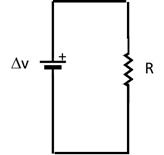

Here is the sample code given in the lab introduction

In [ ]:
/////////////////////////////////////////////////////////
// very simple voltmeter
// will measure 0 to 5V only!
// Voltages outside 0 to 5V will destroy your Arduino!!!
// Don't wire this backwards!
/////////////////////////////////////////////////////////
// define a variable that tells which analog pin we will 
//   use
int AI0 = 0;    //AI0 stands for analog input zero
// define a variable that holds our Delta_v_min
float delta_v_min=0.0049;   // volts per A2D unit
// define a variable for our A2D version of our signal
int ADC_value = 0;
// define a variable for our voltage version of our signal
float voltage = 0.0;
 
/////////////////////////////////////////////////////////
void setup() {
  // put your setup code here, to run once when your
  // Arduino starts up:
  //
  // Initiate Serial Communication, so we can see the
  // voltage on our computer
  Serial.begin(9600);    //9600 baud rate
}
 
/////////////////////////////////////////////////////////
void loop() {
  // Read in the voltage in A2D units form the serial port
  //   remember that AI0 is the pin number to read from
  ADC_value = analogRead(AI0); 
  // Let's print out our A2D version of our signal
  Serial.print(" A2D ");
  Serial.print(ADC_value); 
  // Now convert to voltage units using delta_v_min
  voltage = ADC_value * delta_v_min;
  // And print out our voltage version of our signal
  Serial.print(" voltage ");
  // Print the voltage with 4 significant figures)
  Serial.println(voltage, 4);  
}
/////////////////////////////////////////////////////////
/////////////////////////////////////////////////////////

3.4.1.a I built the circuit and collected data using the example code.

1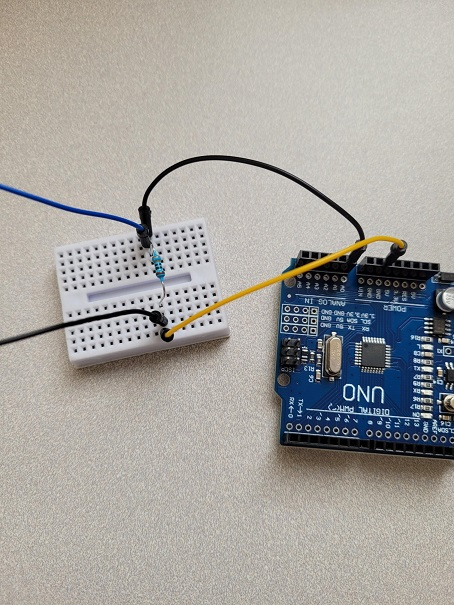

3.4.1.b  Calculate the uncertainty due to quantization error for your Arduino simple voltmeter.

The quantization error for our Arduino is $\Delta V = 0.0049V$.  This is just our $		\Delta v_{\min }=\frac{5{V}}{1024}=4. 9{mV} $.
If we look at the data coming off of the arduino, then we see that the values are all exactly integer multiples of 0.0049V.  I copied a few values from the serial monitor and printed both the A2D units and the voltages.  You can see they are all integer A2D units and voltage increments of 4.9mV.

A2D	966	voltage	4.7334		
A2D	966	voltage	4.7334	0	0
A2D	966	voltage	4.7334	0	0
A2D	966	voltage	4.7334	0	0
A2D	964	voltage	4.7236	-0.0098	-2
A2D	966	voltage	4.7334	0.0098	2
A2D	967	voltage	4.7383	0.0049	1
A2D	963	voltage	4.7187	-0.0196	-4
A2D	967	voltage	4.7383	0.0196	4
A2D	964	voltage	4.7236	-0.0147	-3
A2D	966	voltage	4.7334	0.0098	2
A2D	966	voltage	4.7334	0	0
A2D	965	voltage	4.7285	-0.0049	-1
A2D	966	voltage	4.7334	0.0049	1
A2D	965	voltage	4.7285	-0.0049	-1
A2D	965	voltage	4.7285	0	0
A2D	966	voltage	4.7334	0.0049	1
A2D	968	voltage	4.7432	0.0098	2


3.4.1.c Compare your calculated uncertainty to the measured uncertainty that you see in your device output. (This is tricky, does the power supply give a truly constant voltage?)
            
It looks like the uncertanity is directly related to our quantization error.  But the error is bigger than just the quantization error because we can see that some times the variation is twice the quantization error, or three times, or even four times.  From my data sample the mean voltage is $4.73274V$ with a standard deviation of $0.005192966V$ which is $1.06\times0.0049V$. Here is another data segment and I calculated the mean, standard deviation, and how this compared to the quantization error.


A2D	966	voltage	4.7334			
A2D	966	voltage	4.7334	0	0	
A2D	966	voltage	4.7334	0	0	
A2D	966	voltage	4.7334	0	0	
A2D	964	voltage	4.7236	-0.0098	-2	
A2D	966	voltage	4.7334	0.0098	2	
A2D	967	voltage	4.7383	0.0049	1	
A2D	963	voltage	4.7187	-0.0196	-4	
A2D	967	voltage	4.7383	0.0196	4	
A2D	964	voltage	4.7236	-0.0147	-3	
A2D	966	voltage	4.7334	0.0098	2	
A2D	966	voltage	4.7334	0	0	
A2D	965	voltage	4.7285	-0.0049	-1	
A2D	966	voltage	4.7334	0.0049	1	
A2D	965	voltage	4.7285	-0.0049	-1	
A2D	965	voltage	4.7285	0	0	
A2D	966	voltage	4.7334	0.0049	1	
A2D	968	voltage	4.7432	0.0098	2	
A2D	966	voltage	4.7334	-0.0098	-2	
A2D	967	voltage	4.7383	0.0049	1	
A2D	967	voltage	4.7383	0	0	
A2D	966	voltage	4.7334	-0.0049	-1	
A2D	967	voltage	4.7383	0.0049	1	
A2D	966	voltage	4.7334	-0.0049	-1	
A2D	965	voltage	4.7285	-0.0049	-1	
A2D	966	voltage	4.7334	0.0049	1	
A2D	967	voltage	4.7383	0.0049	1	
A2D	965	voltage	4.7285	-0.0098	-2	
A2D	966	voltage	4.7334	0.0049	1	
						
						
			4.732724138	0.005192966		1.059788993


3.4.2  Build a new extended Voltmeter Using a Voltage Divider.  Build the voltage divider using two resistors as described in  section 3,2. You will have to think about which resistors from our set will work best. Discuss this with your group, or have group members try the calculations with different combinations.

For this circuit I needed two resistors.

3.4.2.a My resistor choices ere 42.7kOhm and 10kOhm (but I measured the resistance of the 10kOhm to be 9.99kOhm. The design says I should get 

$\left( \frac{20{V}}{42.7{k\Omega}+9.99{k\Omega}}\right) \left( 9.99{k\Omega}\right) = 3.\, 792\,0{V}$

on my Arduino for a 20V input to the voltage divider.  

3.4.2.b  Use a multimeter to verify that the output of the voltage divider is
			never more than $5{V}$ and never less than $0{V}.$ Take your power supply all the way from $0{V}$ to $20{V}$ and watch the multimeter to ensure it stays in the $0$ to $5{V}.$ Range. Do this with a multimeter before you hook up your Arduino. You are making sure everything works so you won't destroy your Arduino!


I measured this with my multimeter to make sure it would work.



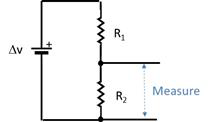

3.4.2.c 	Write the sketch and then hook the output of your voltage divider to the A0 pin and the other side of $R_{2} $ to a GND pin.

For the code to give the full range I used the following:

In [ ]:
/////////////////////////////////////////////////////////
// Extended Voltmeter
// This voltmeter with the values given below
// is designed to measure a 0 to 20V range with 1024 
// discrete values of with an uncertainty of about 0.02V
/////////////////////////////////////////////////////////
 //set up a variable to represent Analog Input 0
int AI0 = 0;         
// Resistance of R1(put in your actual value here)
float R1 = 42700.0; 
// Resistance of R2(put in your actual value here)  
float R2 = 9990.0;  
 
int ADC_value = 0;    // Place to put the A2D values
float voltage = 0.0;  // calculated signal voltage
//mV Arduino's minimum detectable voltage
float delta_v_min = 0.0049 ;
 
/////////////////////////////////////////////////////////
void setup() {
  //Initiate Serial Communication
  Serial.begin(9600);    //9600 baud rate
}
 
/////////////////////////////////////////////////////////
void loop() {
  // read the serial data from AI0
  ADC_value = analogRead(AI0);
  // if you want to, print out the channel A2D values. 
  // Uncomment if you want them.
  //Serial.print("analog channel value ");
  //Serial.print(ADC_value);
  // calculate the signal voltage 
  voltage=ADC_value*(delta_v_min)*(R1+R2)/R2;
  // print out the signal voltage
  Serial.print(" voltage ");
  Serial.println(voltage, 4);  
}
/////////////////////////////////////////////////////////
/////////////////////////////////////////////////////////

I got $3.783V \pm 0.003V$ on my arduino measurement for $20V.$ And of course $0V$ on my arduino for $0V$ input.

I forgot to take a picture of my wiring for this part :-(

3.4.2.d  What is the quantization error for this voltmeter? Check to see if this matches your values on the serial monitor.

To get the quantization error we take the normal Arduino quantization error and run it through our equation that projects to 20V.  This is the same equation we used in the code

$\delta V=(1)\delta V_{min}\frac{R_1+R_2}{R_2}$


In [3]:
  print((1)*(0.0049)*(42700+9990)/9990)


0.02584394394394394


This is quite a bit bigger than the $\delta V_{min}$ but it is similar to what I saw on the serial monitor.

3.4.2.e  Design a voltage divider that will allow the full $0$ to $30{V}$ range of our power supply to be measured using the Arduino's $0$ to $5{V}$ analog input. What would the quantization error be for this new circuit? 

This last part says we should "design" a system that will use the whole $30V$ of the power supply.  But it doesn't say to build it. So I don't feel constrained to use resistors that we actually have.  Here is my design:

$R1 = 42.742.7{k\Omega}$ and $R2= 8{k\Omega}$
Then for an input $30V$ I would get

$\left( \frac{30{V}}{42.7{k\Omega}+8{k\Omega}}\right) \left( 8{k\Omega}\right) = 4.\, 733\,7{V}$ 
which is withing the arduiono's $5V.$ There is some wastiage but But this also gives us some margin.

